# Chapter 1: Exploratory Data Analysis

## 1.1 Estimates of Location

In [68]:
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import weighted

<b>Formula

$ 평균 = \bar{x} = \frac{\sum^{n}_{i}x_i}{n}$

$ 절사평균 = \bar{x} = \frac{\sum^{n-p}_{i=p+1}x_{(i)}}{n-2p} $

$ 가중평균 = \bar{x_w} = \frac{\sum^{n}_{i=1}w_iX_i}{\sum^{n}_{i}w_i} $

In [69]:
state = pd.read_csv('./data/state.csv')

In [70]:
state['Population'].mean() #평균

6162876.3

In [71]:
stats.trim_mean(state['Population'], 0.1) #절사평균

4783697.125

In [72]:
state['Population'].median() #중앙값

4436369.5

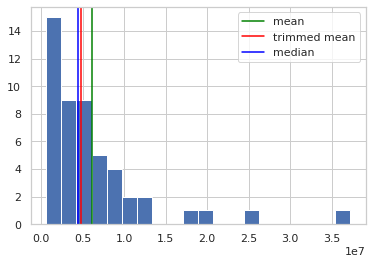

In [73]:
plt.hist(state['Population'], bins=20)
plt.axvline(state['Population'].mean(), color='green', label='mean')
plt.axvline(trim_mean(state['Population'], 0.1), color='red', label='trimmed mean')
plt.axvline(state['Population'].median(), color='blue', label='median')
plt.legend()

In [74]:
np.average(state.loc[:,'Murder.Rate'],weights=state.loc[:,'Population']) #가중 평균

4.445833981123393

In [75]:
weighted.median(state['Murder.Rate'], state['Population']) #가중 중앙값

4.4

## 1.2 Estimates of Variability

<b> Formula
    
$평균절대편차 = \frac{\sum^{n}_{i=1}|x_i - \bar{x}|}{n} $

$분산 = S^2 = \frac{\sum(x-\bar{x})^2}{n-1}$

$표준편차 = S = \sqrt{\frac{\sum(x-\bar{x})^2}{n-1}}$

분산, 표준편차, 평균절대 편차등 모두 특잇값과 극단값에 로버스트하지 않다. 특히 분산과 표준편차는 제곱 편차를 사용하기때문에
특잇값에 민감하다. 
로버스트한 변위 추정값으로는 중위 절대 편차(MAD)가 있다.

$중위절대편차 = 중앙값(|x_1-m|,|x_2-m|,...,|x_n-m|) $

In [76]:
state['Population'].std()

6848235.347401142

In [77]:
q1,q3 = np.percentile(state['Population'],[25,75])
q3-q1

4847308.0

In [78]:
stats.median_absolute_deviation(state['Population'])

3849870.3852

## 1.3 Exploring the Data Distribution

In [79]:
np.percentile(state['Murder.Rate'], [5,25,50,75,95])

array([1.6  , 2.425, 4.   , 5.55 , 6.51 ])

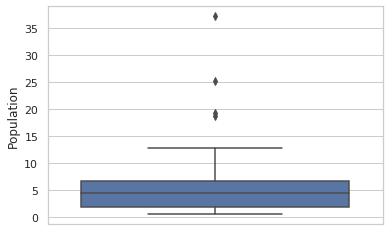

In [80]:
sns.boxplot(y=state['Population']/1000000)

In [81]:
state['pop_cut'] = pd.cut(state['Population'], 11)

In [82]:
state['pop_cut'].value_counts()

(526935.67, 3899110.545]        24
(3899110.545, 7234595.091]      14
(7234595.091, 10570079.636]      5
(10570079.636, 13905564.182]     3
(17241048.727, 20576533.273]     2
(33918471.455, 37253956.0]       1
(23912017.818, 27247502.364]     1
(30582986.909, 33918471.455]     0
(27247502.364, 30582986.909]     0
(20576533.273, 23912017.818]     0
(13905564.182, 17241048.727]     0
Name: pop_cut, dtype: int64

In [113]:
state['pop_cut'] = state['pop_cut'].map(lambda x : x.left)

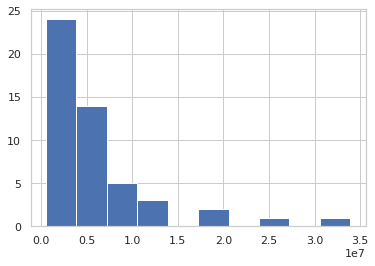

In [115]:
plt.hist(state['pop_cut'])
plt.show()

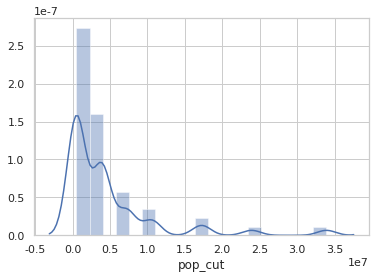

In [116]:
sns.distplot(state['pop_cut'])
plt.show()

## 1.4 Exploring Binary and Categorical Data

In [117]:
dfw = pd.read_csv('./data/dfw_airline.csv')

In [118]:
dfw.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


In [125]:
dfwm = dfw.melt()
dfwm

,variable,value
0,Carrier,64263.16
1,ATC,84856.50
2,Weather,11235.42
3,Security,343.15
4,Inbound,118427.82


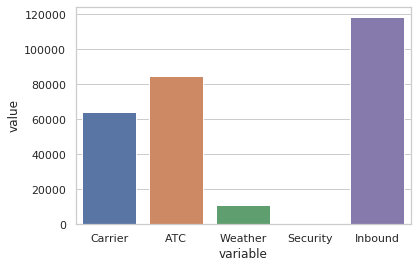

In [128]:
sns.barplot(x='variable', y='value', data=dfwm)

## 1.5 Correlation

$ r = \frac{\sum^{N}_{i=1}(x_i - \bar{x})(y_i-\bar{y})}{(N-1)s_{x}s_{y}} $

In [151]:
sp500_px = pd.read_csv('./data/sp500_px.csv')
sp500_sym = pd.read_csv('./data/sp500_sym.csv')

In [172]:
etf = sp500_sym[sp500_sym.sector == 'etf'].symbol.unique()

In [156]:
sp500_px.rename(columns={'Unnamed: 0':'date'}, inplace=True)

In [175]:
etfs = sp500_px.loc[sp500_px.date > '2012-07-01', etf]

In [176]:
etfs.corr(method='pearson')

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
XLI,1.000000,0.785865,0.888865,0.869680,0.056554,-0.468196,0.236881,0.782380,0.650054,0.798080,0.380809,0.784144,0.374000,0.663022,0.600424,0.787340,0.777773
QQQ,0.785865,1.000000,0.908995,0.834440,0.043553,-0.470555,0.199492,0.810158,0.560044,0.839701,0.346667,0.713463,0.421790,0.775392,0.614806,0.752771,0.945126
SPY,0.888865,0.908995,1.000000,0.953726,0.078722,-0.547074,0.272069,0.833937,0.713300,0.887028,0.481928,0.826053,0.406181,0.811269,0.744466,0.883616,0.886588
DIA,0.869680,0.834440,0.953726,1.000000,0.051523,-0.511327,0.256793,0.758012,0.658311,0.847043,0.463364,0.787415,0.383928,0.771044,0.753725,0.860556,0.842757
GLD,0.056554,0.043553,0.078722,0.051523,1.000000,-0.107488,0.216563,0.070110,0.188625,0.017467,0.121611,0.184366,-0.042233,-0.010200,0.033047,0.043039,0.053022
VXX,-0.468196,-0.470555,-0.547074,-0.511327,-0.107488,1.000000,-0.195397,-0.448942,-0.448474,-0.474756,-0.260395,-0.470890,-0.205661,-0.380925,-0.416913,-0.514365,-0.477258
USO,0.236881,0.199492,0.272069,0.256793,0.216563,-0.195397,1.000000,0.249799,0.525943,0.183275,0.113182,0.324166,0.078796,0.119500,0.116857,0.221760,0.225962
IWM,0.782380,0.810158,0.833937,0.758012,0.070110,-0.448942,0.249799,1.000000,0.586991,0.779750,0.325003,0.701533,0.387274,0.664288,0.537065,0.756282,0.760438
XLE,0.650054,0.560044,0.713300,0.658311,0.188625,-0.448474,0.525943,0.586991,1.000000,0.578956,0.337942,0.689778,0.260463,0.454457,0.413486,0.599129,0.559324
XLY,0.798080,0.839701,0.887028,0.847043,0.017467,-0.474756,0.183275,0.779750,0.578956,1.000000,0.366827,0.721232,0.370299,0.702860,0.663055,0.782053,0.772189


In [177]:
etfs.corr(method='spearman')

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
XLI,1.000000,0.737456,0.859671,0.833283,0.001889,-0.588289,0.226028,0.745857,0.594476,0.748999,0.349936,0.721402,0.401843,0.615989,0.572047,0.734876,0.724369
QQQ,0.737456,1.000000,0.886539,0.790605,0.007333,-0.616262,0.199993,0.774622,0.504952,0.794925,0.303783,0.665991,0.452337,0.715948,0.567225,0.692004,0.923572
SPY,0.859671,0.886539,1.000000,0.935364,0.027640,-0.691927,0.255748,0.811897,0.665322,0.846197,0.458740,0.782131,0.444554,0.767847,0.708742,0.841222,0.861209
DIA,0.833283,0.790605,0.935364,1.000000,0.011770,-0.647342,0.249949,0.719133,0.615886,0.798644,0.433353,0.744630,0.403544,0.721826,0.723914,0.807473,0.803930
GLD,0.001889,0.007333,0.027640,0.011770,1.000000,-0.011265,0.168583,0.038010,0.155706,-0.025666,0.095062,0.139204,-0.007992,-0.036797,-0.007018,-0.005489,0.020091
VXX,-0.588289,-0.616262,-0.691927,-0.647342,-0.011265,1.000000,-0.236413,-0.604190,-0.509473,-0.580920,-0.321357,-0.547030,-0.334123,-0.544293,-0.478178,-0.632814,-0.603530
USO,0.226028,0.199993,0.255748,0.249949,0.168583,-0.236413,1.000000,0.236308,0.484985,0.168273,0.139925,0.299661,0.120054,0.130618,0.119021,0.212823,0.224537
IWM,0.745857,0.774622,0.811897,0.719133,0.038010,-0.604190,0.236308,1.000000,0.528708,0.740452,0.305607,0.643751,0.449745,0.626476,0.499992,0.717238,0.719830
XLE,0.594476,0.504952,0.665322,0.615886,0.155706,-0.509473,0.484985,0.528708,1.000000,0.515063,0.346582,0.619681,0.271056,0.411401,0.381063,0.548519,0.507399
XLY,0.748999,0.794925,0.846197,0.798644,-0.025666,-0.580920,0.168273,0.740452,0.515063,1.000000,0.349618,0.656685,0.410162,0.648295,0.621016,0.709007,0.718070


findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans.


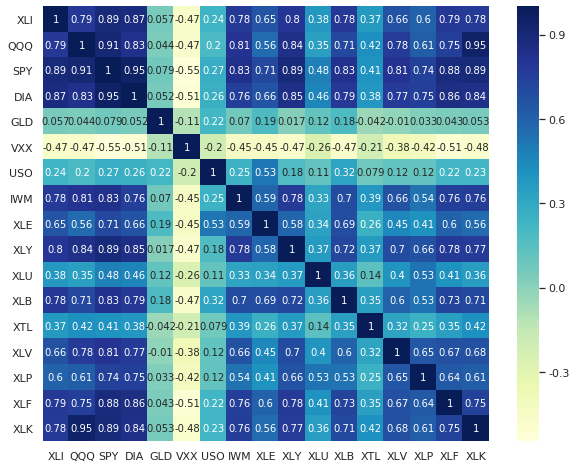

In [184]:
plt.figure(figsize=(10,8))
sns.heatmap(etfs.corr(), cmap="YlGnBu", annot=True)

In [226]:
'r = ' + str(round(sp500_px[['T','VZ']].corr().iloc[0,1],3))

'r = 0.617'

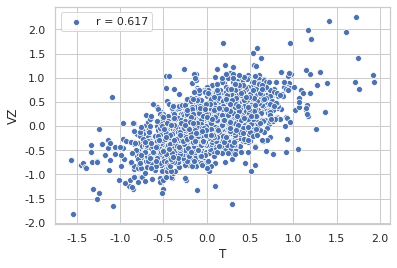

In [227]:
sns.scatterplot(x='T', y='VZ', data=sp500_px, label='r = ' + str(round(sp500_px[['T','VZ']].corr().iloc[0,1],3)))

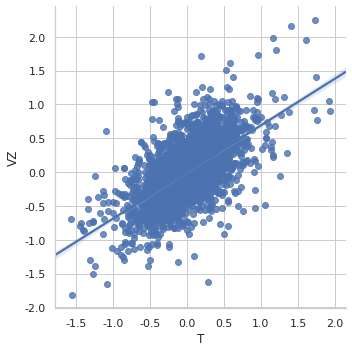

In [232]:
sns.lmplot(x='T', y='VZ', data=sp500_px)

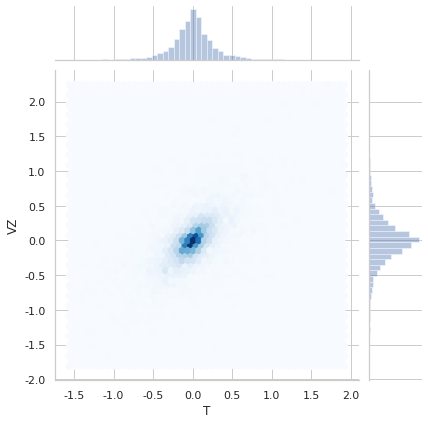

In [230]:
sns.jointplot(x='T', y='VZ', data=sp500_px, kind='hex', cmap="Blues")
plt.show()

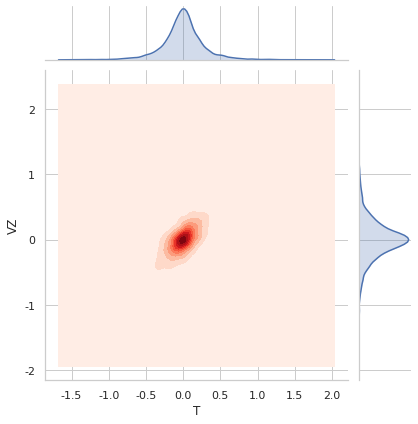

In [234]:
sns.jointplot(x='T', y='VZ', data=sp500_px, kind='kde', cmap="Reds")
plt.show()